In [1]:
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
import numpy as np
pd.set_option("display.max_columns",None)

In [2]:
data=pd.read_csv("dataset.csv")

In [3]:
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [4]:
data.shape

(303, 14)

In [5]:
data["target"].value_counts()

1    165
0    138
Name: target, dtype: int64

#### The data is balanced

### Null Values in Features?

In [6]:
null=[i for i in data.columns if data[i].isnull().sum()>0]

null

[]

##### No null values

## Let us handle Categorical Features

In [7]:
cat_feat=[i for i in data.columns if data[i].dtypes=="O"]

print(data[cat_feat].shape)
data[cat_feat].head()

(303, 0)


""
0
1
2
3
4


#### No Categorical Features

## Numerical Features

<AxesSubplot:xlabel='age'>

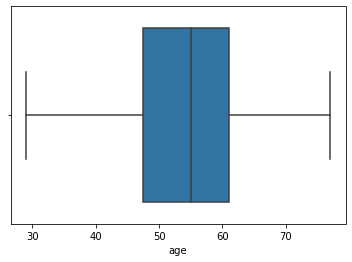

In [8]:
sb.boxplot(x=data["age"])    

In [9]:
x=data.drop(columns="target")

y=data["target"]

In [10]:
from sklearn.model_selection import cross_val_score,RandomizedSearchCV,train_test_split

from sklearn.ensemble import AdaBoostClassifier,RandomForestClassifier

import xgboost

from sklearn.neighbors import KNeighborsClassifier

from sklearn.linear_model import LogisticRegression

from sklearn.cluster import KMeans,DBSCAN

from sklearn.metrics import accuracy_score,classification_report,confusion_matrix

In [11]:
trainx,testx,trainy,testy=train_test_split(x,y,test_size=0.25,random_state=4)

trainx.shape,testx.shape,trainy.shape,testy.shape

((227, 13), (76, 13), (227,), (76,))

In [12]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()

trainxs=sc.fit_transform(trainx)
testxs=sc.fit_transform(testx)

In [13]:
df

NameError: name 'df' is not defined

In [14]:
ad=AdaBoostClassifier()
rf=RandomForestClassifier()
xgc=xgboost.XGBClassifier()
kn=KNeighborsClassifier()
km=KMeans()
db=DBSCAN()
log=LogisticRegression()

In [ ]:
ff

In [ ]:
scoread=cross_val_score(ad,trainx,trainy,cv=10)

scoread.mean()*100

In [ ]:
scorerf=cross_val_score(rf,trainx,trainy,cv=10)

scorerf.mean()*100

In [ ]:
scorexg=cross_val_score(xgc,trainx,trainy,cv=10,n_jobs=-1)

scorexg.mean()*100

In [ ]:
scorekn=cross_val_score(kn,trainx,trainy,cv=10)

scorekn.mean()*100

In [ ]:
scorelog=cross_val_score(log,trainx,trainy,cv=10,n_jobs=-1)

scorelog.mean()*100

## I will be using the Random Forest Regression model

In [ ]:
rfc=rf.fit(trainx,trainy)

y11=rfc.predict(testx)

print(accuracy_score(testy,y11)*100)

print(classification_report(testy,y11))

print(confusion_matrix(testy,y11))

### Hypertuning the model

In [ ]:
n_estimators = [int(i) for i in np.linspace(100,2000,50)]
criterion = ["gini", "entropy"]
max_depth = [i for i in np.linspace(100,1000,10)]
min_samples_split = [i for i in np.arange(2,11)]
min_samples_leaf = [i for i in np.arange(0,11)]
max_features = ["auto", "sqrt", "log2"]

In [ ]:
search={"n_estimators":n_estimators,
        "criterion" : criterion,
        "max_depth" : max_depth,
        "min_samples_split" : min_samples_split,
        "min_samples_leaf" : min_samples_leaf,
        "max_features" : max_features}

In [ ]:
bestrf=RandomizedSearchCV(estimator=rf,param_distributions=search,n_iter=10,cv=10,n_jobs=-1,verbose=2,random_state=100)

In [ ]:
bestrf.fit(trainx,trainy)

In [ ]:
y1=bestrf.predict(testx)

In [ ]:
print(accuracy_score(testy,y1)*100)

print(classification_report(testy,y1))

print(confusion_matrix(testy,y1))

## Let me try Logistic Regression

In [ ]:
lgc=log.fit(trainx,trainy)

y31=lgc.predict(testx)

print(accuracy_score(testy,y31)*100)

print(classification_report(testy,y31))

print(confusion_matrix(testy,y31))

### HyperTuning the Model

In [15]:
searchlog={"penalty":['l1', 'l2', 'elasticnet', 'none'],
           "tol":[float(i) for i in np.linspace(0.0001,0.01,100)],
           "C":[float(i) for i in np.linspace(1,10,10)],
           "solver":['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'],
           "max_iter":[int(i) for i in np.linspace(10,2000,100)],
           "multi_class":['auto', 'ovr', 'multinomial'],
          "intercept_scaling":[float(i) for i in np.linspace(1,100,100)]}

In [16]:
bestlog=RandomizedSearchCV(estimator=log,param_distributions=searchlog,n_iter=10,cv=10,n_jobs=-1,verbose=2,random_state=100)

In [17]:
bestlog.fit(trainx,trainy)

Fitting 10 folds for each of 10 candidates, totalling 100 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  44 tasks      | elapsed:    8.2s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    8.6s finished


RandomizedSearchCV(cv=10, estimator=LogisticRegression(), n_jobs=-1,
                   param_distributions={'C': [1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0,
                                              8.0, 9.0, 10.0],
                                        'intercept_scaling': [1.0, 2.0, 3.0,
                                                              4.0, 5.0, 6.0,
                                                              7.0, 8.0, 9.0,
                                                              10.0, 11.0, 12.0,
                                                              13.0, 14.0, 15.0,
                                                              16.0, 17.0, 18.0,
                                                              19.0, 20.0, 21.0,
                                                              22.0, 23.0, 24.0,
                                                              25.0, 26.0, 27.0,
                                                              28.0, 29.0, 30

In [18]:
bestlog.best_params_

{'tol': 0.0093,
 'solver': 'liblinear',
 'penalty': 'l2',
 'multi_class': 'ovr',
 'max_iter': 1417,
 'intercept_scaling': 11.0,
 'C': 4.0}

In [19]:
y2=bestlog.predict(testx)

print(accuracy_score(testy,y2)*100)

print(classification_report(testy,y2))

print(confusion_matrix(testy,y2))

84.21052631578947
              precision    recall  f1-score   support

           0       0.89      0.73      0.80        33
           1       0.82      0.93      0.87        43

    accuracy                           0.84        76
   macro avg       0.85      0.83      0.83        76
weighted avg       0.85      0.84      0.84        76

[[24  9]
 [ 3 40]]


#### The Logistic Regression gave me a better result

### XGBOOST

In [ ]:
xg=xgc.fit(trainx,trainy)

y21=xg.predict(testx)

print(accuracy_score(testy,y21)*100)

print(classification_report(testy,y21))

print(confusion_matrix(testy,y21))

### Hyper Tuning the Model

In [ ]:
searchxg={"n_estimators":[int(i) for i in np.linspace(100,2000,25)],
       "learning_rate":[float(i) for i in np.linspace(0,1,20)],
       "max_depth":[int(i) for i in np.arange(1,11)],
       "min_child_weight":[float(i) for i in np.linspace(0,2,20)],
       "gamma":[float(i) for i in np.linspace(0,2,20)],
         "base_score":[float(i) for i in np.linspace(0,1,20)],
        "importance_type":["gain", "weight", "cover", "total_gain", "total_cover"],
        "num_parallel_tree":[int(i) for i in np.arange(1,11)]}

In [ ]:
bestxg=RandomizedSearchCV(estimator=xgc,param_distributions=searchxg,cv=10,n_iter=1,random_state=100)

In [ ]:
bestxg.fit(trainx,trainy)

In [ ]:
bestxg.best_params_

In [ ]:
y3=bestxg.predict(testx)

print(accuracy_score(testy,y3)*100)

print(classification_report(testy,y3))

print(confusion_matrix(testy,y3))

In [20]:
import pickle

In [21]:
pickle.dump(bestlog,open("heartmodel.pkl","wb"))